In [32]:
import uproot
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
log_columns = [
        # 'fMassK0', 
        # 'fMassLambda', 
        # 'fMassAntiLambda', 
        # 'fPt', 
        # 'fPtPos', 
        # 'fPtNeg',
        # 'fTpcInnerParPos', 
        # 'fTpcInnerParNeg', 
        'fRadius', 
        'fCpa',
        # 'fDcaV0Daughters', 
        # 'fDcaV0ToPv', 
        # 'fNSigmaTpcPosPi', 
        # 'fNSigmaTpcNegPi',
        # 'fNSigmaTpcPosPr', 
        # 'fNSigmaTpcNegPr', 
        # 'fNSigmaTofPosPi',
        # 'fNSigmaTofNegPi', 
        # 'fNSigmaTofPosPr', 
        # 'fNSigmaTofNegPr', 
        # 'fAlphaArm',
        # 'fQtArm', 
        # 'fOccupancyFt0c', 
        # 'fOccupancyIts', 
        # 'fCentralityFT0C',
        # 'fCentralityFT0M', 
        # 'fCandFlag'
]

custom_ranges = {
        'fMassK0': (0.4, 
        0.6),
        'fMassLambda': (1.07, 1.3),
        'fMassAntiLambda': (1.07, 1.3),
        'fPt': (0, 5),
        'fPtPos': (0, 5),
        'fPtNeg': (0, 5),
        # 'fTpcInnerParPos', 
        # 'fTpcInnerParNeg', 
        'fRadius': (0, 50),
        # 'fCpa': (0, 1),
        # 'fDcaV0Daughters', 
        # 'fDcaV0ToPv', 
        'fNSigmaTpcPosPi': (-10, 10),
        'fNSigmaTpcNegPi': (-10, 10),
        'fNSigmaTpcPosPr': (-10, 10),
        'fNSigmaTpcNegPr': (-10, 10),
        'fNSigmaTofPosPi': (-10, 10),
        'fNSigmaTofNegPi': (-10, 10),
        'fNSigmaTofPosPr': (-10, 10),
        'fNSigmaTofNegPr': (-10, 10),
        # 'fAlphaArm': (0, 1),
        # 'fQtArm': (0, 1),
        'fOccupancyFt0c': (0, 14000),
        'fOccupancyIts': (0, 1400),
        # 'fCentralityFT0C': (0, 1),
        # 'fCentralityFT0M': (0, 1),
        # 'fCandFlag': (0, 1)
}

custom_bins = {
        'fMassK0': 100,
        'fMassLambda': 100,
        'fMassAntiLambda': 100,
        'fPt': 100,
        'fPtPos': 100,
        'fPtNeg': 100,
        'fTpcInnerParPos': 100, 
        'fTpcInnerParNeg': 100, 
        'fRadius': 100,
        'fCpa': 100,
        'fDcaV0Daughters': 100, 
        'fDcaV0ToPv': 100, 
        'fNSigmaTpcPosPi': 100,
        'fNSigmaTpcNegPi': 100,
        'fNSigmaTpcPosPr': 100,
        'fNSigmaTpcNegPr': 100,
        'fNSigmaTofPosPi': 100,
        'fNSigmaTofNegPi': 100,
        'fNSigmaTofPosPr': 100,
        'fNSigmaTofNegPr': 100,
        'fAlphaArm': 100,
        'fQtArm': 100,
        'fOccupancyFt0c': 100,
        'fOccupancyIts': 100,
        'fCentralityFT0C': 100,
        'fCentralityFT0M': 100,
        'fCandFlag': 100
}

n_columns = 27
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

In [34]:
df_data = pd.read_parquet("/data/shared/hf_pid_studies_pbpb/v0s/Data/Train306573/LHC23zzh_pass4_small_v0s.parquet", engine="pyarrow") 
df_mc = pd.read_parquet("/data/shared/hf_pid_studies_pbpb/v0s/MC/Train306702/LHC24g2_medium.parquet", engine="pyarrow")

# DATA 


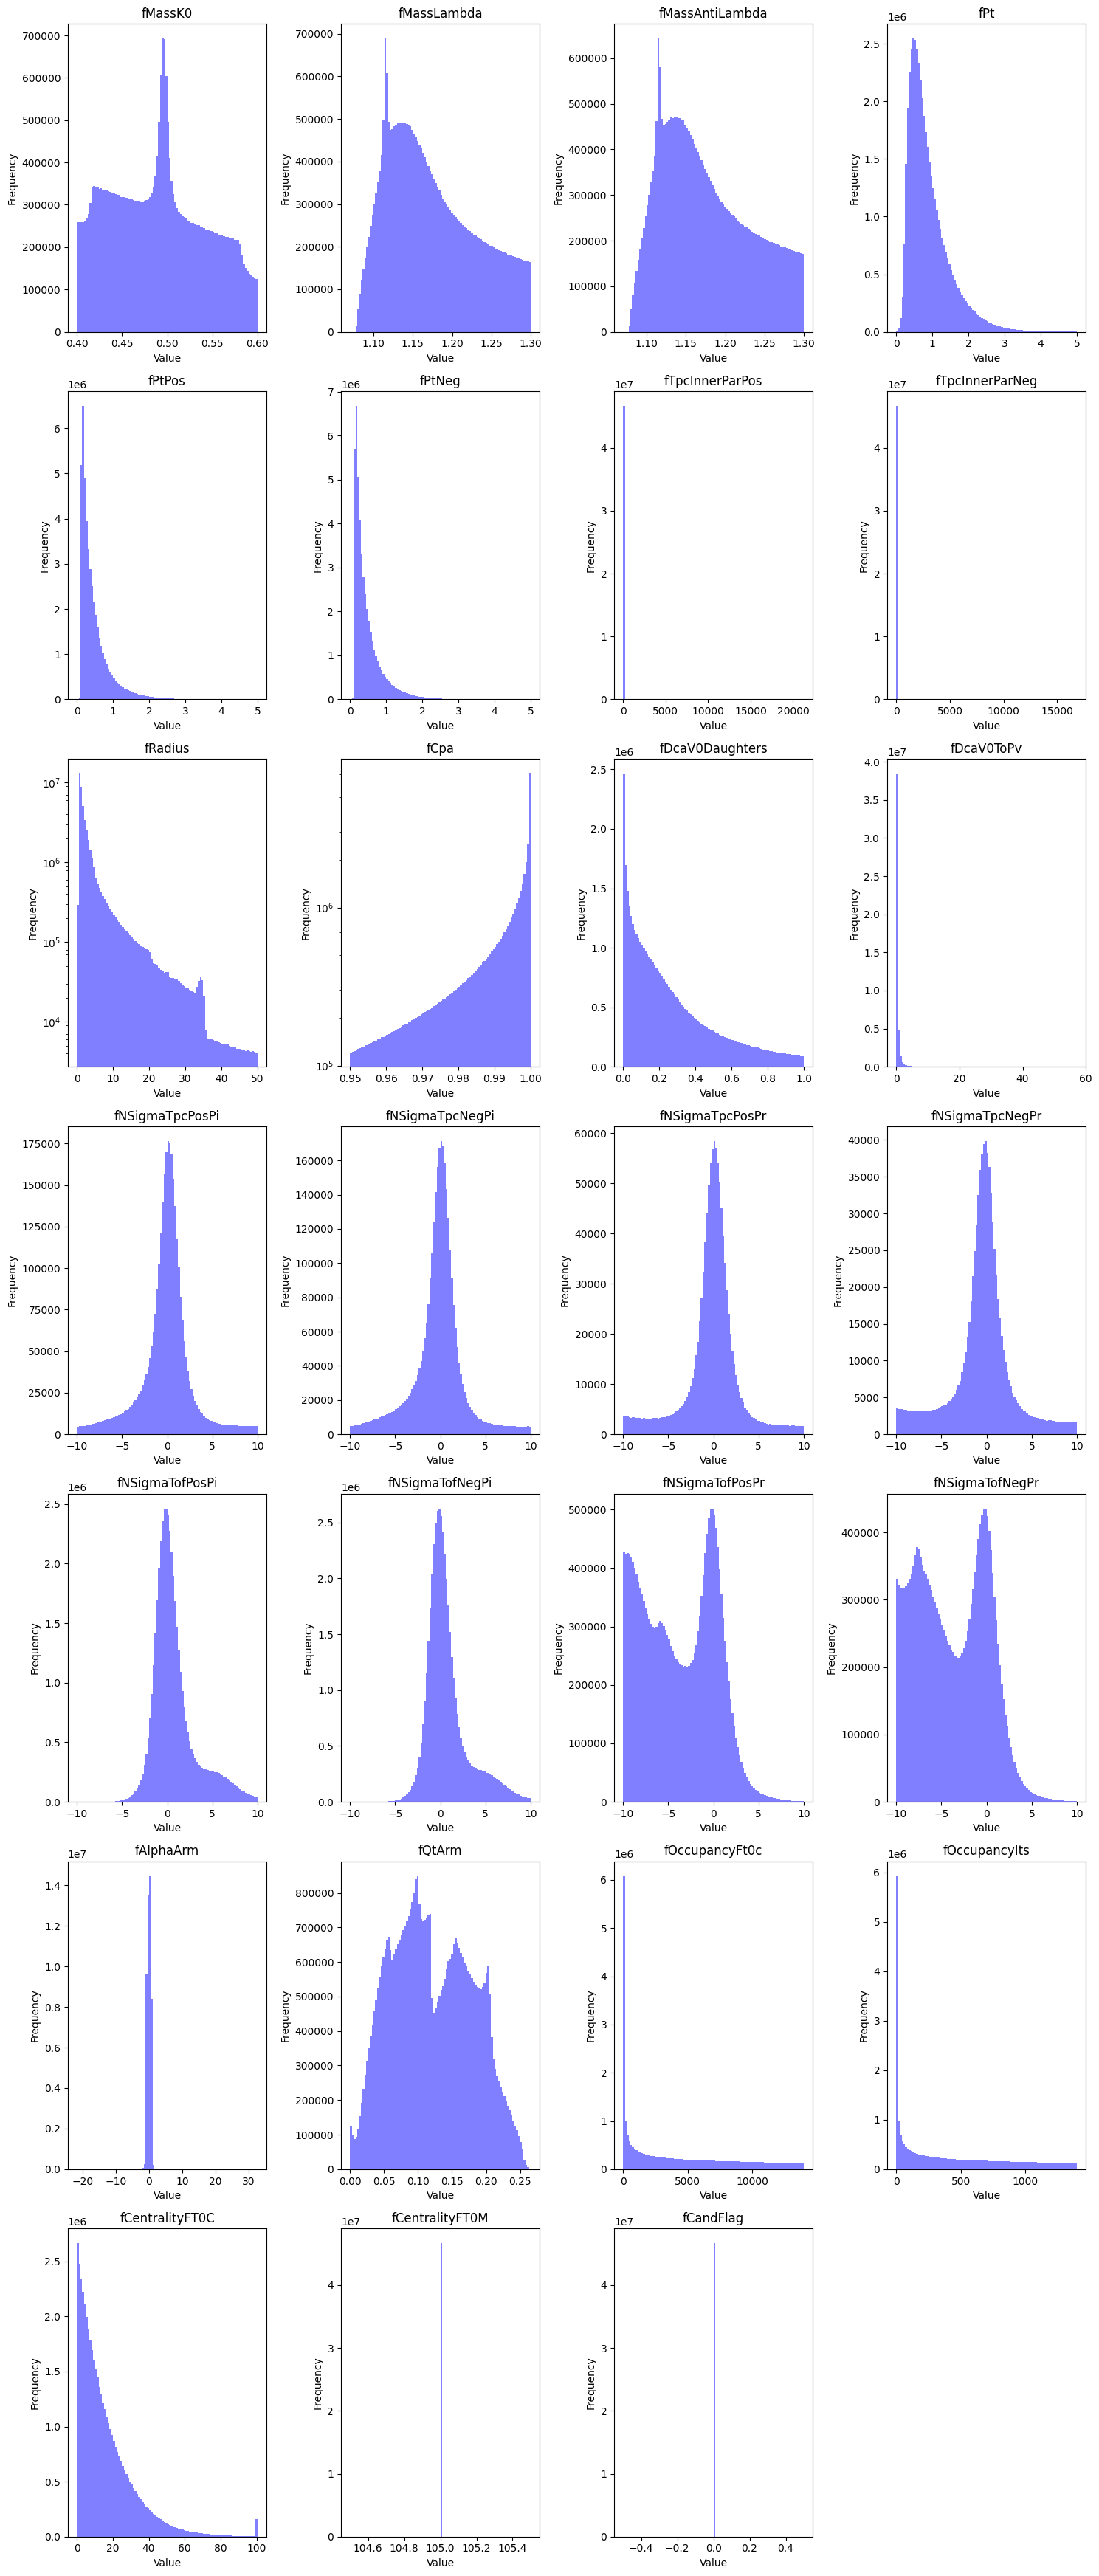

In [35]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

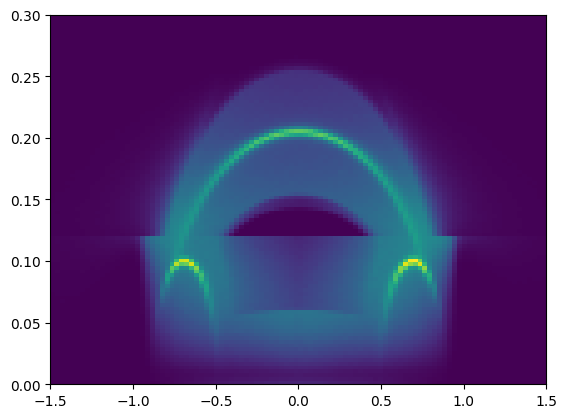

In [36]:
h, xedges, yedges, img = plt.hist2d(df_data["fAlphaArm"], df_data["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()

In [37]:
topological_sel = "fCpa > 0.999 and (fMassK0 < 0.470 or fMassK0 > 0.525) and fQtArm < 0.12 and fRadius > 0.5 and "
selection_mass_lambda = "((fMassLambda > 1.05 and fMassLambda < 1.130) and (fMassAntiLambda < 1.05 or fMassAntiLambda > 1.130))"
selection_mass_antilambda = "((fMassLambda < 1.05 or fMassLambda > 1.130) and (fMassAntiLambda > 1.05 and fMassAntiLambda < 1.130))"
selection = topological_sel + selection_mass_lambda
# selection = topological_sel + selection_mass_antilambda
sel_df_data = df_data.query(selection)
print(f"[bef. sel.] Number of dataframe entries: {len(df_data)}")
print(f"[aft. sel.] Number of dataframe entries: {len(sel_df_data)}")
print(f"Dataframe columns: {sel_df_data.columns}")

[bef. sel.] Number of dataframe entries: 46634262
[aft. sel.] Number of dataframe entries: 1614038
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fTpcInnerParPos', 'fTpcInnerParNeg', 'fRadius', 'fCpa',
       'fDcaV0Daughters', 'fDcaV0ToPv', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


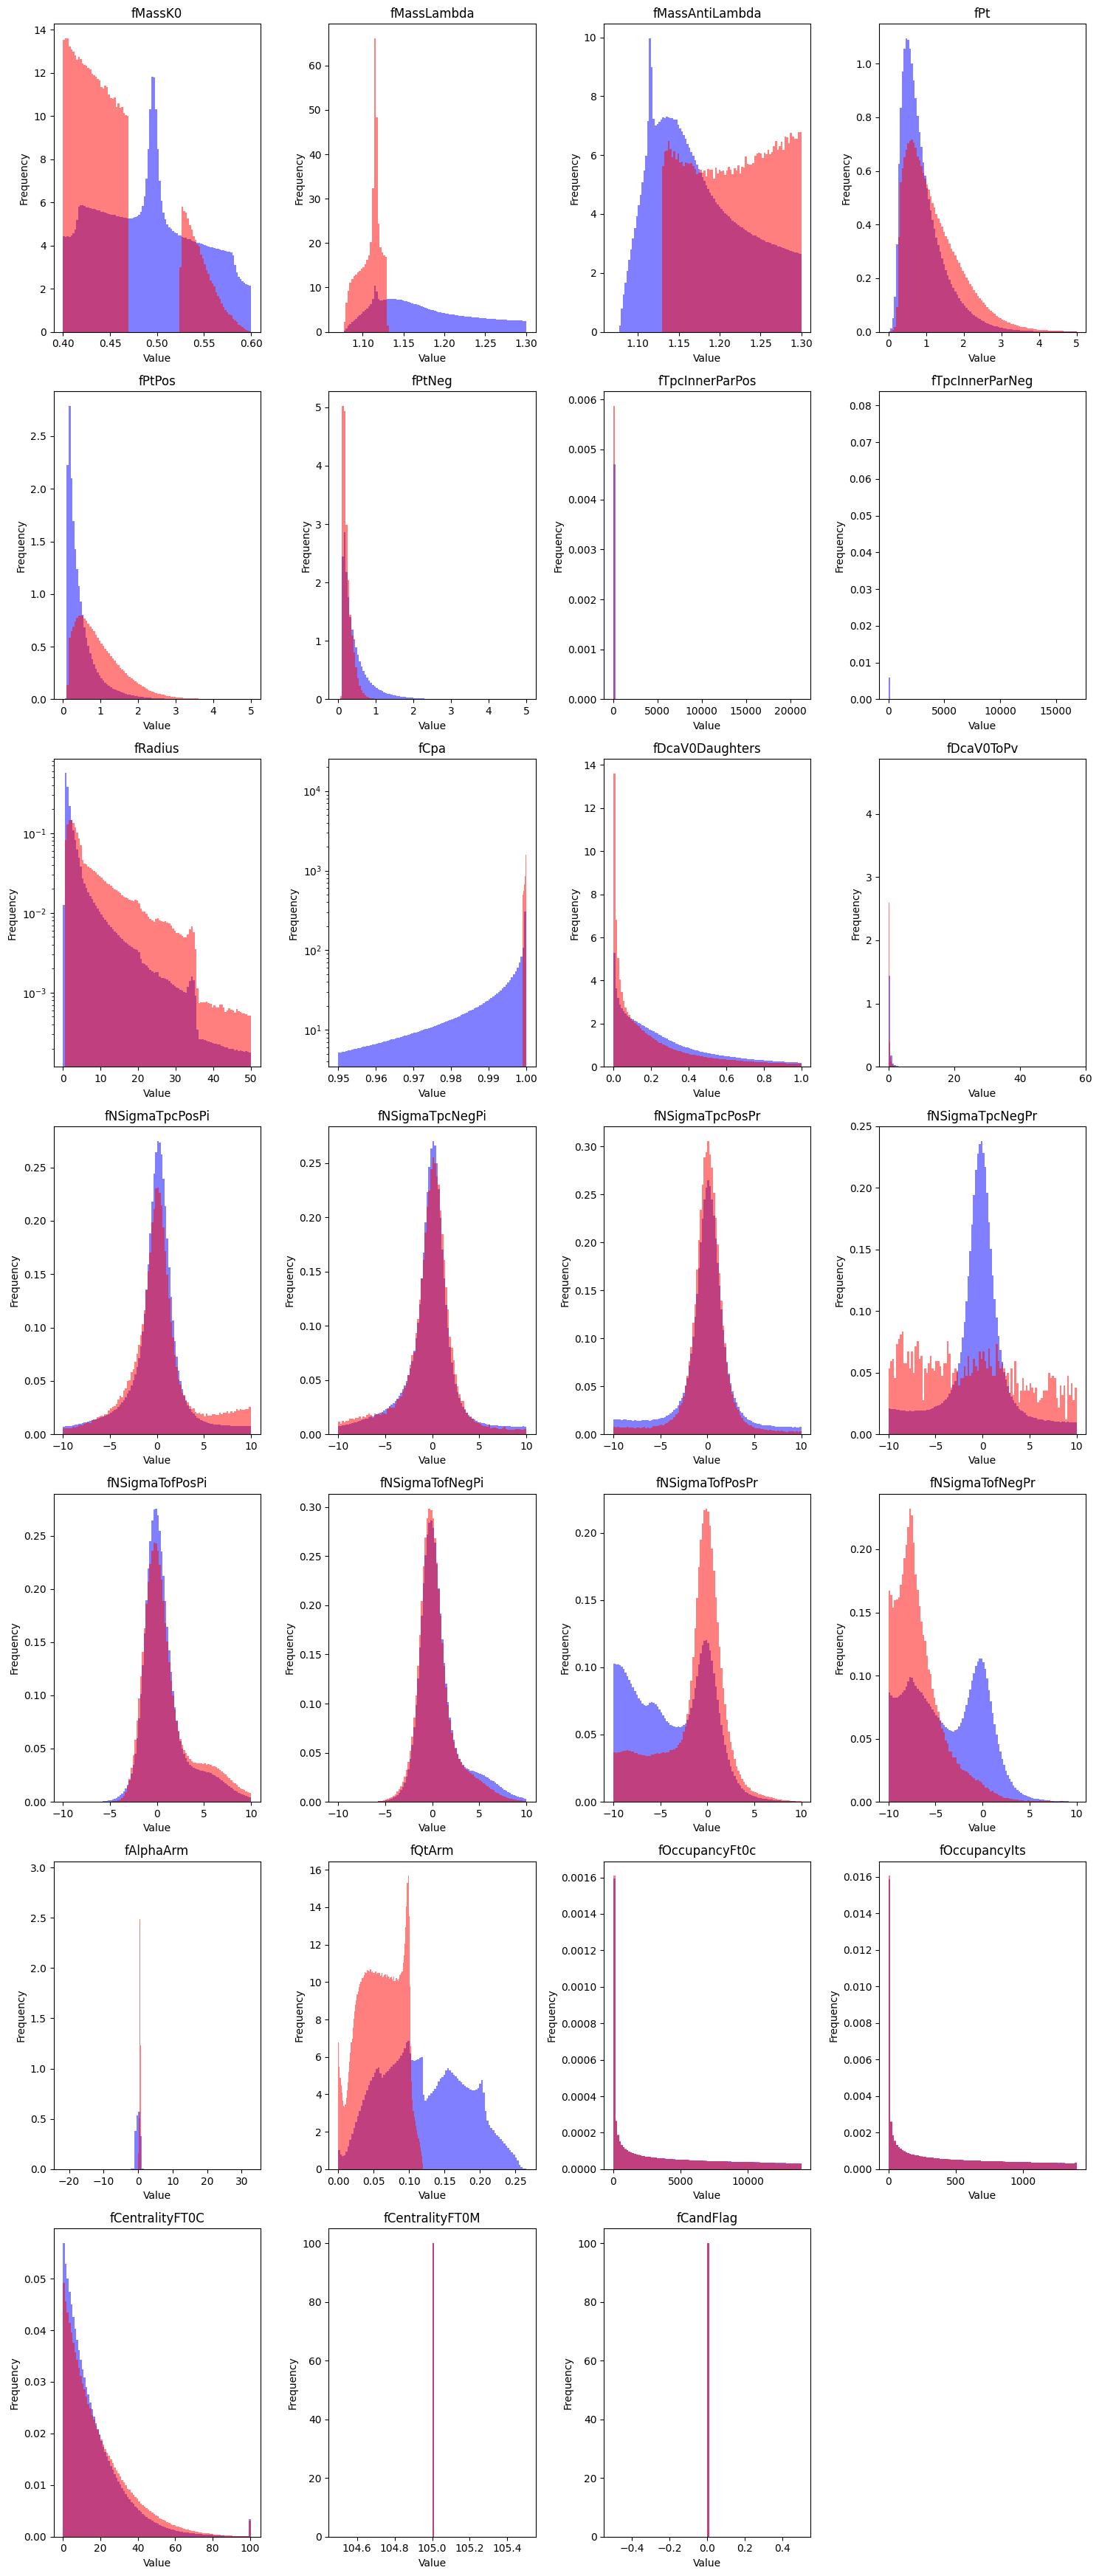

In [38]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_data.columns):
    axes[i].hist(df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", density=True, color='blue')
    axes[i].hist(sel_df_data[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", density=True, color='red')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# MC

In [39]:
selection = "fCandFlag == 2" # Lambdas
# selection = "fCandFlag == -2" # AntiLambdas
sel_df_mc = df_mc.query(selection)
print(f"[bef. sel.] Number of dataframe entries: {len(df_mc)}")
print(f"[aft. sel.] Number of dataframe entries: {len(sel_df_mc)}")
print(f"Dataframe columns: {sel_df_mc.columns}")

[bef. sel.] Number of dataframe entries: 50955271
[aft. sel.] Number of dataframe entries: 10801052
Dataframe columns: Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fTpcInnerParPos', 'fTpcInnerParNeg', 'fRadius', 'fCpa',
       'fDcaV0Daughters', 'fDcaV0ToPv', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')


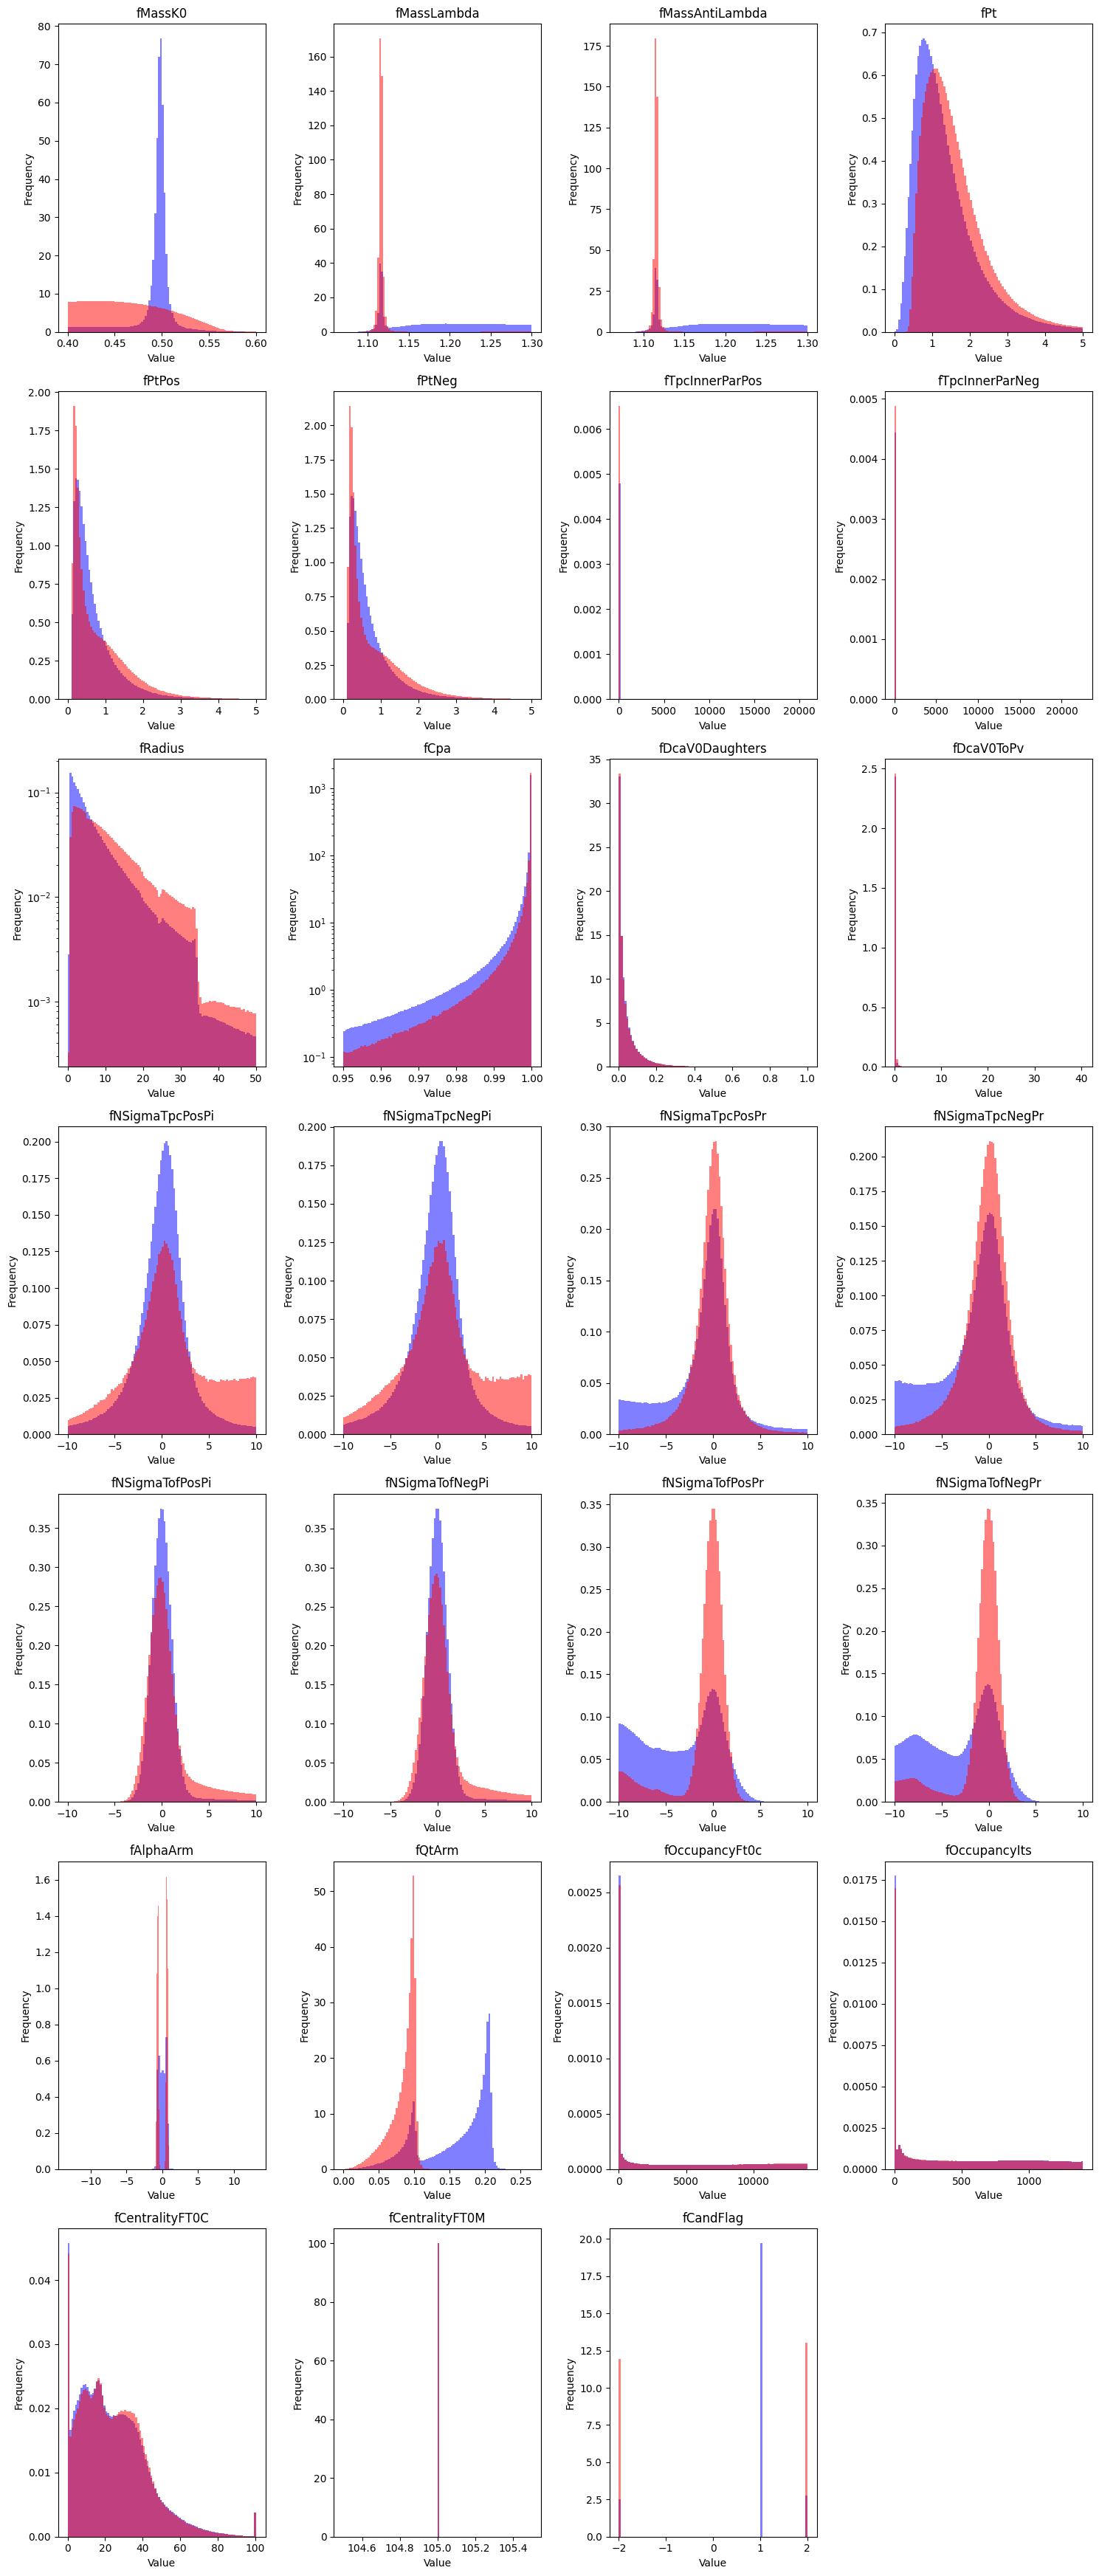

In [40]:
fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(df_mc.columns):
    axes[i].hist(df_mc[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="before sel", color='blue', density=True)
    axes[i].hist(sel_df_mc[column], bins=custom_bins.get(column, 20), range=custom_ranges.get(column, None), alpha=0.5, label="after sel", color='red', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    if column in log_columns:
        axes[i].set_yscale('log')

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

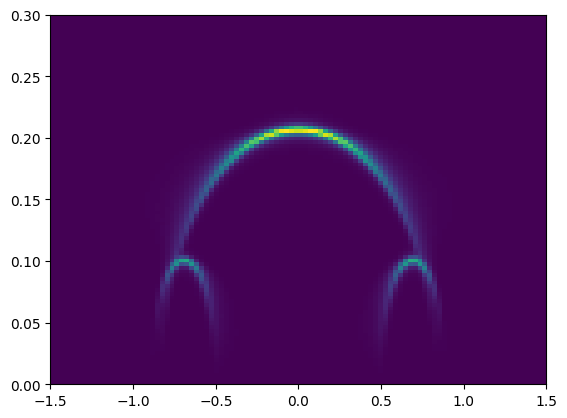

In [41]:
h, xedges, yedges, img = plt.hist2d(df_mc["fAlphaArm"], df_mc["fQtArm"], bins=(100, 100), range=((-1.5, 1.5), (0, 0.3)))
plt.show()